**Pontifícia Universidade Católica de Minas Gerais**<br/>
**Tópicos em computação I**<br/>
**Prof. Felipe Domingos da Cunha**

*Jully Ketely Alves da Silva*

# Informações do conjunto de dados

Uma grande rede social de desenvolvedores do GitHub que foi coletada da API pública em junho de 2019. Os nós são desenvolvedores que marcaram pelo menos 10 repositórios com estrela e as bordas são relacionamentos de seguidores mútuos entre eles. Os recursos do vértice são extraídos com base na localização, repositórios marcados, empregador e endereço de e-mail. A tarefa relacionada ao gráfico é a classificação de nós binários - é preciso prever se o usuário do GitHub é um desenvolvedor web ou de aprendizado de máquina. Esse recurso de destino foi derivado do cargo de cada usuário.

# **Análise da rede social de desenvolvedores do Github usando Python**

In [ ]:
!pip install networkx
!pip install matplotlib
!pip install pandas

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json

### 1.1 Carregamento dos arquivos

In [ ]:
data = pd.read_csv("data/musae_git_edges.csv")

In [ ]:
G = nx.Graph()

In [ ]:
for _, row in data.iterrows():
    G.add_edge(row["id_1"], row["id_2"])

In [ ]:
with open("data/musae_git_features.json", "r") as f:
    features_data = json.load(f)

for node, features in features_data.items():
    G.nodes[int(node)]['features'] = features

In [ ]:
attributes_data = pd.read_csv("data/musae_git_target.csv")

for _, row in attributes_data.iterrows():
    node_id = row["id"]
    G.nodes[node_id]['name'] = row["name"]
    G.nodes[node_id]['ml_target'] = row["ml_target"]

### 1.2 Resumo geral do grafo

In [ ]:
num_nodes = len(G.nodes)
print(f"Número de nós: {num_nodes}")

num_edges = len(G.edges)
print(f"Número de arestas: {num_edges}")

avg_degree = sum(d for n, d in G.degree()) / num_nodes
print(f"Grau médio: {avg_degree}")

density = nx.density(G)
print(f"Densidade: {density}")


Número de nós: 37700
Número de arestas: 289003
Grau médio: 15.331724137931035
Densidade: 0.0004066878203117068


### 1.3 Gerando imagem gráfica

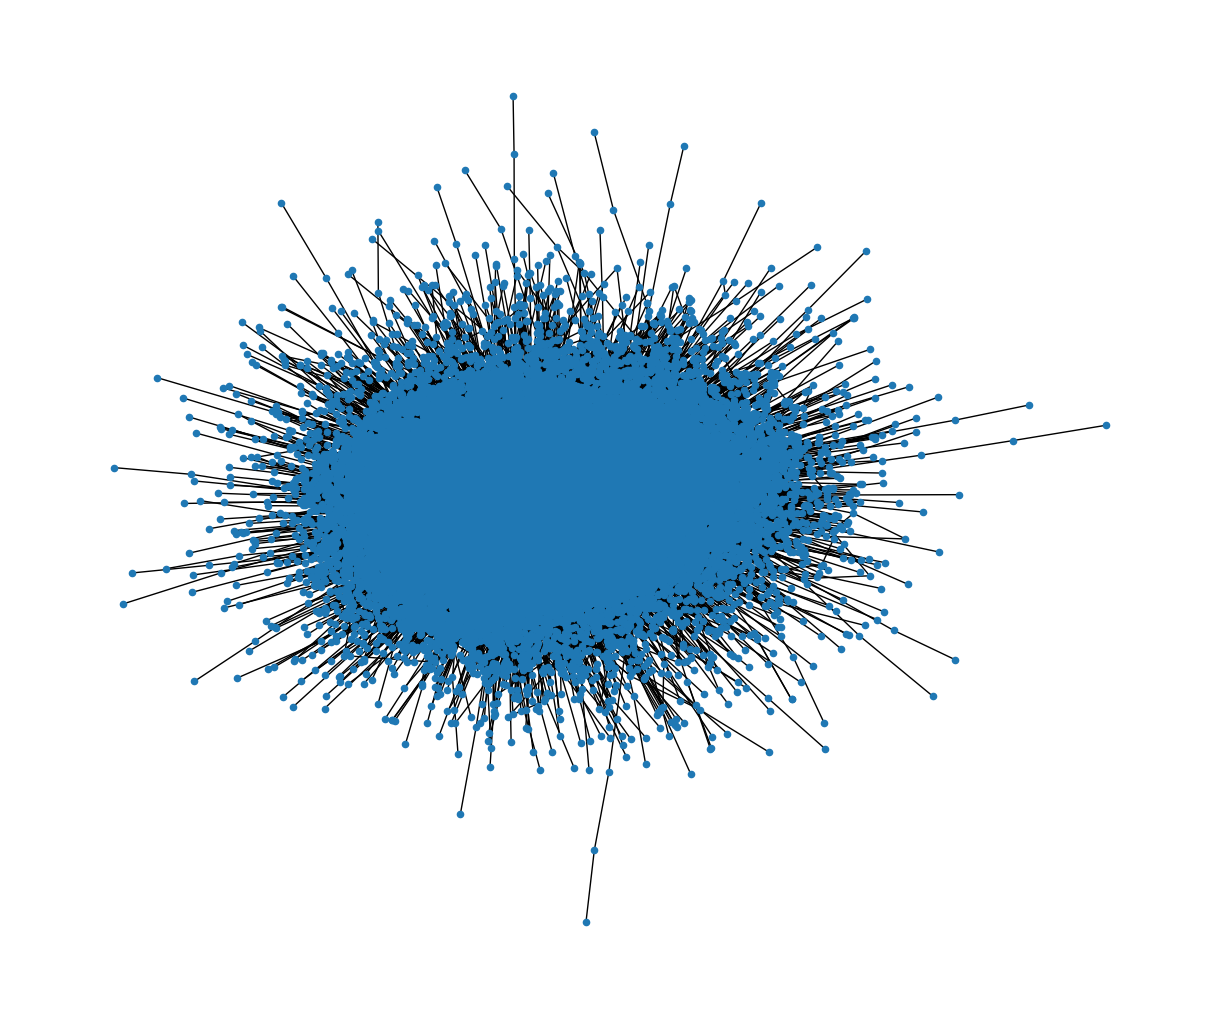

In [27]:
plt.figure(figsize=(12,10))

position = nx.spring_layout(G)

nx.draw(G, pos=position, node_size=20)

### 1.4 Distribuição de graus

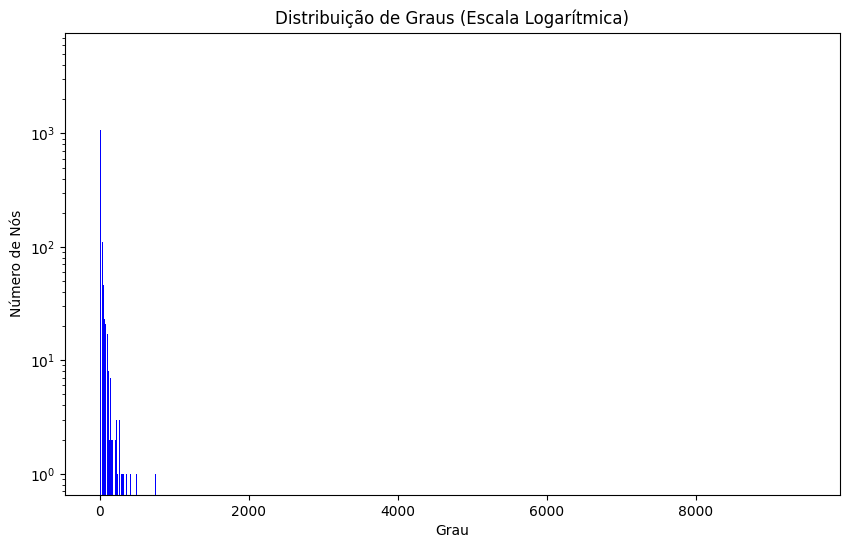

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = pd.Series(degree_sequence).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(degree_count.index, degree_count.values, color='b')
plt.title("Distribuição de Graus (Escala Logarítmica)")
plt.xlabel("Grau")
plt.ylabel("Número de Nós")
plt.yscale('log')
plt.show()

In [ ]:
average_shortest_path_length = nx.average_shortest_path_length(G)
print(f"Média do Caminho Mais Curto: {average_shortest_path_length}")


Média do Caminho Mais Curto: 3.2464090056353823


In [ ]:
average_clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de Agrupamento Médio: {average_clustering_coefficient}")

Coeficiente de Agrupamento Médio: 0.16753704480107323


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
average_betweenness_centrality = sum(betweenness_centrality.values()) / len(G.nodes)
print(f"Intermediação Média: {average_betweenness_centrality}")

Intermediação Média: 5.958960702518314e-05


In [ ]:
triangles = sum(nx.triangles(G).values()) // 3
print(f"\nNúmero total de triângulos: {triangles}")


Número total de triângulos: 523810


## Análise final

Os dados apresentam uma rede com grande número de nós (**37.700**) e arestas (**289.003**), sendo entendido que existe uma comunidade grande e densamente conectada do Github.

Um grau médio de **15,33** sugere que, em média, cada nó está conectado a outros **15,33** nós na rede. Isso pode indicar uma rede moderadamente conectada.

A densidade da rede expressa a proporção de conexões existentes em relação ao número total de conexões possíveis. Com uma densidade relativamente baixa (**0,0004067**), pode-se inferir que a rede não é completamente conectada, sugerindo uma certa quantidade de dispersão ou heterogeneidade nas conexões.

A média do caminho mais curto é relativamente baixa (**3,25**), indicando que a rede é relativamente pequena e pode ser facilmente percorrida de um nó para outro.

O coeficiente de agrupamento médio mede a tendência de nós em formar grupos ou clusters. Um valor de **0,1675** sugere que a rede possui agrupamentos, mas não é altamente clusterizada. Pode haver áreas específicas da rede onde os nós têm mais conexões entre si do que com o resto da rede.

A intermediação média mede a importância relativa de um nó como intermediário nas comunicações na rede. Um valor muito baixo (**5,96e-05**) indica que a intermediação pode não ser uma característica proeminente nesta rede.

A presença de um grande número de triângulos na rede (**523.810**) pode indicar uma tendência para a formação de comunidades ou _clusters_, uma vez que os triângulos são uma representação de conexões entre grupos de três nós.

A rede está moderadamente conectada, com uma estrutura que inclui algumas áreas densamente conectadas e outras mais dispersas. A presença significativa de triângulos sugere a formação de comunidades ou _clusters_ na rede.